In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data_2007_2014.csv")
df.head(10)

c:\Users\Hinata\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
# menghapus kolom yang terlalu banyak unique value dan tidak penting

df.drop(["desc", "Unnamed: 0", "id", "member_id", "emp_title", "url", 
         "purpose", "title", "zip_code", "addr_state", "policy_code", 
         "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "issue_d", 
         "collections_12_mths_ex_med"], 
        axis = 1, 
        inplace = True)

* Diperlukan pemahaman domain knowledge untuk memilih kolom yang tidak terlalu penting atau terlalu banyak unique valuenya, sehingga harus berhati-hati dalam melakukan langkah ini.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

* Terlihat bahwa data memiliki banyak missing value pada beberapa kolom.
* Loan status adalah kolom target atau label dari data diatas.

In [6]:
# Melihat persentase jumlah missing value pada semua kolom

features_na = [features for features in df.columns if df[features].isnull().sum() > 1]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4))

emp_length 0.0451
annual_inc 0.0
delinq_2yrs 0.0001
inq_last_6mths 0.0001
mths_since_last_delinq 0.5369
mths_since_last_record 0.8657
open_acc 0.0001
pub_rec 0.0001
revol_util 0.0007
total_acc 0.0001
next_pymnt_d 0.4873
mths_since_last_major_derog 0.7877
annual_inc_joint 1.0
dti_joint 1.0
verification_status_joint 1.0
acc_now_delinq 0.0001
tot_coll_amt 0.1507
tot_cur_bal 0.1507
open_acc_6m 1.0
open_il_6m 1.0
open_il_12m 1.0
open_il_24m 1.0
mths_since_rcnt_il 1.0
total_bal_il 1.0
il_util 1.0
open_rv_12m 1.0
open_rv_24m 1.0
max_bal_bc 1.0
all_util 1.0
total_rev_hi_lim 0.1507
inq_fi 1.0
total_cu_tl 1.0
inq_last_12m 1.0


* Terlihat bahwa banyak kolom yang sama sekali tidak mempunyai isi. Kolom ini akan dihapus.
* Kolom dengan missing value lebih besar dari 30% juga akan dihapus karena dikhawatirkan akan menimbulkan bias.
* Kolom yang missing value lebih kecil dari 30% akan diisi.

In [7]:
# Menghapus kolom dengan missing value lebih besar dari 30%

for feature in features_na:
    if df[feature].isnull().mean() > 0.3:
        df.drop([feature], axis = 1, inplace = True)

In [8]:
# memisahkan kolom objek dengan kolom numerik

numerik = df[[col for col in df.columns if (str(df[col].dtype) != 'object')]]
categori = df[[col for col in df.columns if (str(df[col].dtype) == 'object')]]

In [9]:
# statistik descriptive untuk data numerik

numerik.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,...,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,...,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,...,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,...,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,...,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,...,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [10]:
# deskripsi data kategori

categori.describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type
count,466285,466285,466285,445277,466285,466285,466285,466285,466285,466285
unique,2,7,35,11,6,3,9,2,2,1
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Current,n,f,INDIVIDUAL
freq,337953,136929,31686,150049,235875,168055,224226,466276,303005,466285


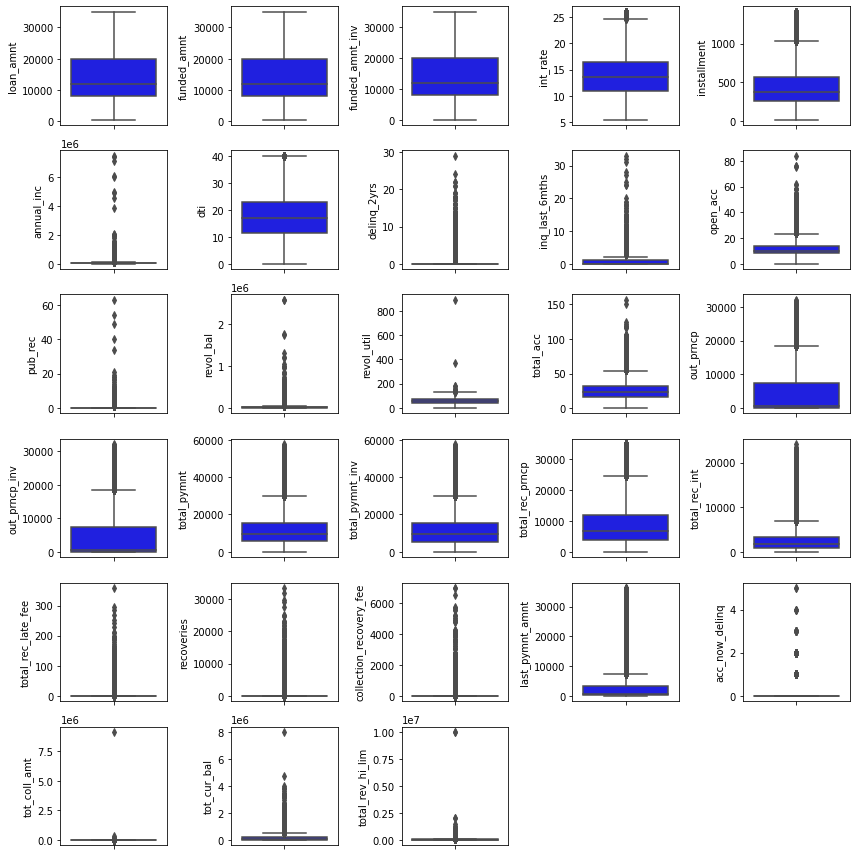

In [11]:
# Melihat distribusi data dari kolom numerik dengan box plot

i = 1
plt.figure(figsize = (12, 12))
for col in numerik.columns:
    plt.subplot(6, 5, i)
    sns.boxplot(y = numerik[col], color = "blue", orient = "v")
    plt.tight_layout()
    i += 1

In [12]:
# melihat nilai dari skewnes dan curtosis untuk menentukan cara mengisi nilai missing value

print("Skew : \n{}".format(numerik.skew()))
print()
print("Kurtosis : \n{}".format(numerik.kurtosis()))

Skew : 
loan_amnt                    0.730980
funded_amnt                  0.734845
funded_amnt_inv              0.730250
int_rate                     0.334938
installment                  0.949293
annual_inc                  29.568905
dti                          0.188283
delinq_2yrs                  5.345748
inq_last_6mths               2.142143
open_acc                     1.165698
pub_rec                     14.941355
revol_bal                   19.476291
revol_util                  -0.160962
total_acc                    0.813061
out_prncp                    1.590189
out_prncp_inv                1.590503
total_pymnt                  1.406403
total_pymnt_inv              1.404658
total_rec_prncp              1.445591
total_rec_int                2.268276
total_rec_late_fee          13.843497
recoveries                  13.149942
collection_recovery_fee     22.236096
last_pymnt_amnt              2.560644
acc_now_delinq              20.798291
tot_coll_amt               618.273011
tot_

In [13]:
# melihat sebaran nilai data ketegorikal

for col in categori: 
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value count kolom grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value count kolom sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Value count kolom emp_length:
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

Value coun

In [14]:
nan_col_objek = [i for i in df.columns if df[i].isnull().sum() > 0 and df[i].dtype == 'object']
nan_col_numerik = [i for i in df.columns if df[i].isnull().sum() > 0 and df[i].dtype != 'object' and df[i].nunique() > 20]
nan_kategori = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype != 'object' and df[i].nunique() < 20]
nan_col_categori = nan_col_objek + nan_kategori  

In [15]:
nan_col_categori

['emp_length', 'acc_now_delinq']

In [16]:
#menghapus missing value untuk numerikal dan kategorikal data sesuai dengan keadaan skew

def hapus_nan(data): 
    for col in nan_col_objek:
        data[col].fillna(method='ffill',inplace=True)
    for cols in nan_col_numerik:
        data[cols].fillna(value=np.mean(data[cols]),inplace=True)
        
hapus_nan(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   sub_grade                466285 non-null  object 
 8   emp_length               466285 non-null  object 
 9   home_ownership           466285 non-null  object 
 10  annual_inc               466285 non-null  float64
 11  verification_status      466285 non-null  object 
 12  loan_status              466285 non-null  object 
 13  pymnt_plan               466285 non-null  object 
 14  dti 

In [18]:
# menyimpan kolom yang memiliki skewness > 2.5

numeric_skew_data_name = [i for i in df.columns if df[i].dtype != 'O' and df[i].skew()>2.5]

In [19]:
# normalisasi data yang memiliki skewness > 2.5

def remove_skewnes(data):
    for col in numeric_skew_data_name:
        data[col] = data[col].apply(lambda x: np.log(x + 1))
    return data

df = remove_skewnes(df)

In [20]:
#handle dulicated data
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


In [21]:
df.shape

(466285, 38)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   sub_grade                466285 non-null  object 
 8   emp_length               466285 non-null  object 
 9   home_ownership           466285 non-null  object 
 10  annual_inc               466285 non-null  float64
 11  verification_status      466285 non-null  object 
 12  loan_status              466285 non-null  object 
 13  pymnt_plan               466285 non-null  object 
 14  dti 

In [23]:
col_label_encode = ["grade", "sub_grade", "emp_length"]
col_onehot_encode = ["term", "home_ownership", "verification_status", "pymnt_plan", "initial_list_status", "application_type"]

In [24]:
# one hot encoding pada data kategori tak bertingkat
df = pd.get_dummies(data = df, columns = col_onehot_encode)

In [25]:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# label encoder untuk data kategori bertingkat
df[col_label_encode] = df[col_label_encode].apply(lambda col: le.fit_transform(col))

In [26]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# menangani outlier
filtered_entries = np.array([False] * len(df))
for col in ['tot_cur_bal', 'total_rev_hi_lim', 'acc_now_delinq', 'tot_coll_amt', 
 'collection_recovery_fee', 'last_pymnt_amnt', 'int_rate', 
 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries']:
    zscore = abs(stats.zscore(df[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data = df[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 466285
9.464944494262527
13.257270606428673
nan
5.907324366085224
9.617662468182635
4.281731018025038
2.806777775761663
4.016377351505416
9.15041898979715
2.90038401950042
8.841614253949391
29.49463774062107
14.599477122163334
14.99504705410745
7.855668502490388
35.24384044875305
11.287775089859545
4.366640984955985
4.368187091909886
5.5938820615559655
5.610231749026797
3.716610204632432
8.70314915464726
11.883933927886309
6.573783707253271
Jumlah baris setelah memfilter outlier: 371131


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371131 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            371131 non-null  int64  
 1   funded_amnt                          371131 non-null  int64  
 2   funded_amnt_inv                      371131 non-null  float64
 3   int_rate                             371131 non-null  float64
 4   installment                          371131 non-null  float64
 5   grade                                371131 non-null  int32  
 6   sub_grade                            371131 non-null  int32  
 7   emp_length                           371131 non-null  int32  
 8   annual_inc                           371131 non-null  float64
 9   loan_status                          371131 non-null  object 
 10  dti                                  371131 non-null  float64
 11  delinq_2yrs  

* Data diatas sudah tidak tidak memiliki missing value.
* Sudah dilakukan penanganan terhadap outlier.
* Loan status adalah label. 
* Kasus ini tergolong kasus klasifikasi.

In [28]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,5000,5000,4975.0,10.65,162.87,1,6,1,10.085851,Fully Paid,...,0,1,0,0,1,1,0,1,0,1
4,3000,3000,3000.0,12.69,67.79,1,9,0,11.289794,Current,...,0,1,0,1,0,1,0,1,0,1
5,5000,5000,5000.0,7.90,156.46,0,3,3,10.491302,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
6,7000,7000,7000.0,15.96,170.08,2,14,8,10.758009,Current,...,0,1,1,0,0,1,0,1,0,1
7,3000,3000,3000.0,18.64,109.43,4,20,9,10.778977,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466278,10000,10000,10000.0,18.25,362.78,3,17,1,10.645449,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
466279,15000,15000,15000.0,13.53,509.25,1,9,4,11.097425,Current,...,0,1,0,1,0,1,0,0,1,1
466280,18400,18400,18400.0,14.47,432.64,2,11,4,11.608245,Current,...,0,0,0,1,0,1,0,0,1,1
466282,20700,20700,20700.0,16.99,514.34,3,15,7,10.736418,Current,...,0,0,0,0,1,1,0,1,0,1


In [29]:
data["loan_status"].value_counts()

Current                                                187033
Fully Paid                                             157490
Charged Off                                             17094
Late (31-120 days)                                       4776
In Grace Period                                          2165
Does not meet the credit policy. Status:Fully Paid        950
Late (16-30 days)                                         849
Default                                                   614
Does not meet the credit policy. Status:Charged Off       160
Name: loan_status, dtype: int64

* loan_status yang berisi Current akan kita jadikan dataset test.
* loan_status yang berisi Fully Paid, Late akan digabungkan dengan data Charged off dan akan dijadikan data training.
* Model akan memprediksi loan_status yang berisi Current dan In Grace Period akan memprediksi fully paid ataukah charged off.

In [30]:
gk = data.groupby("loan_status")

In [31]:
lunas = gk.get_group("Fully Paid")
lunas.sample(8)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
164253,16600,16600,16600.0,10.16,536.89,1,5,10,11.289794,Fully Paid,...,0,1,0,1,0,1,0,0,1,1
57804,16800,16800,16800.0,7.62,523.52,0,2,6,11.813037,Fully Paid,...,0,0,1,0,0,1,0,0,1,1
353522,12000,12000,12000.0,11.67,396.69,1,8,0,11.002117,Fully Paid,...,0,1,0,1,0,1,0,0,1,1
181997,10500,10500,10500.0,18.49,382.19,3,16,1,10.571343,Fully Paid,...,0,1,0,0,1,1,0,1,0,1
363654,7450,7450,7450.0,14.49,256.40,2,13,8,11.066654,Fully Paid,...,0,0,0,1,0,1,0,1,0,1
217644,10000,10000,10000.0,9.76,321.55,1,5,2,11.289794,Fully Paid,...,0,1,1,0,0,1,0,1,0,1
206728,16000,16000,15975.0,7.62,498.59,0,2,6,11.589896,Fully Paid,...,0,0,1,0,0,1,0,1,0,1
203079,11100,11100,11075.0,18.49,404.03,3,16,6,11.251574,Fully Paid,...,0,0,0,0,1,1,0,1,0,1


In [32]:
gak_lunas = gk.get_group("Charged Off")
gak_lunas.sample(8)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
414459,3000,3000,3000.0,19.47,110.69,3,19,0,9.903538,Charged Off,...,0,1,1,0,0,1,0,0,1,1
62955,24000,24000,24000.0,13.67,816.43,1,9,1,11.362114,Charged Off,...,0,0,0,0,1,1,0,1,0,1
153396,10000,10000,10000.0,19.05,366.82,3,18,10,10.492690,Charged Off,...,0,0,0,0,1,1,0,1,0,1
103948,9950,9950,9950.0,16.78,353.66,2,14,7,10.463132,Charged Off,...,0,1,0,0,1,1,0,1,0,1
341702,11200,11200,11200.0,17.57,281.80,3,18,6,11.002117,Charged Off,...,0,1,0,0,1,1,0,0,1,1
224686,11500,11500,11500.0,7.62,358.36,0,2,5,10.474495,Charged Off,...,0,1,1,0,0,1,0,1,0,1
436216,13875,13875,13875.0,15.61,485.14,2,14,9,10.407923,Charged Off,...,0,1,0,1,0,1,0,1,0,1
182379,12000,12000,12000.0,17.77,432.45,3,15,1,10.714440,Charged Off,...,0,1,1,0,0,1,0,1,0,1


* Supaya tidak terjadi imbalanced data, maka kita akan menyamakan jumlah data Fully paid dengan Charged Off

In [33]:
data_training = pd.concat([lunas[:17094], gak_lunas], ignore_index = True)
data_training.head(8)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,5000,5000,4975.0,10.65,162.87,1,6,1,10.085851,Fully Paid,...,0,1,0,0,1,1,0,1,0,1
1,5000,5000,5000.0,7.90,156.46,0,3,3,10.491302,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
2,3000,3000,3000.0,18.64,109.43,4,20,9,10.778977,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
3,6500,6500,6500.0,14.65,153.45,2,12,5,11.184435,Fully Paid,...,1,0,1,0,0,1,0,1,0,1
4,12000,12000,12000.0,12.69,402.54,1,9,1,11.225257,Fully Paid,...,1,0,0,1,0,1,0,1,0,1
5,3000,3000,3000.0,9.91,96.68,1,5,3,9.615872,Fully Paid,...,0,1,0,1,0,1,0,1,0,1
6,1000,1000,1000.0,16.29,35.31,3,15,10,10.239996,Fully Paid,...,0,1,1,0,0,1,0,1,0,1
7,10000,10000,10000.0,15.27,347.98,2,13,4,10.645449,Fully Paid,...,0,1,1,0,0,1,0,1,0,1


In [34]:
data_training = data_training.sample(frac = 1)

In [35]:
data_training.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,...,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
17426,11000,11000,11000.0,17.58,276.83,3,18,3,10.518700,Charged Off,...,0,1,1,0,0,1,0,1,0,1
33476,5000,5000,5000.0,22.40,191.99,4,22,8,11.082158,Charged Off,...,0,1,0,1,0,1,0,1,0,1
18845,4000,4000,4000.0,8.94,127.09,0,4,4,11.082158,Charged Off,...,0,1,0,0,1,1,0,1,0,1
692,9000,9000,9000.0,10.65,293.16,1,6,1,10.714440,Fully Paid,...,0,1,0,0,1,1,0,1,0,1
8130,8000,8000,8000.0,5.99,243.34,0,1,1,11.362114,Fully Paid,...,0,1,1,0,0,1,0,1,0,1


In [36]:
# target
y = data_training["loan_status"]
y = le.fit_transform(y)

In [37]:
# data training
X = data_training.drop(["loan_status"], axis = 1)
X = X.to_numpy()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Sequential Deep Learning

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 50 , kernel_initializer = "normal", input_dim = X_train.shape[1], activation = "relu"),
    tf.keras.layers.Dense(units = 25 , kernel_initializer = "normal", activation = "relu"),
    tf.keras.layers.Dense(units = 1 , kernel_initializer = "normal", activation = "sigmoid")
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="binary_crossentropy", optimizer = "adam")

In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50)

Epoch 1/50
855/855 [==============================] - 2s 2ms/step - loss: 0.1345 - val_loss: 0.0716
Epoch 2/50
855/855 [==============================] - 2s 2ms/step - loss: 0.0390 - val_loss: 0.0197
Epoch 3/50
855/855 [==============================] - 2s 2ms/step - loss: 0.0270 - val_loss: 0.2272
Epoch 4/50
855/855 [==============================] - 1s 2ms/step - loss: 0.0331 - val_loss: 0.0094
Epoch 5/50
855/855 [==============================] - 1s 2ms/step - loss: 0.0438 - val_loss: 0.0172
Epoch 6/50
855/855 [==============================] - 1s 1ms/step - loss: 0.0302 - val_loss: 0.0398
Epoch 7/50
855/855 [==============================] - 1s 2ms/step - loss: 0.0275 - val_loss: 0.0076
Epoch 8/50
855/855 [==============================] - 2s 2ms/step - loss: 0.0215 - val_loss: 0.0103
Epoch 9/50
855/855 [==============================] - 1s 1ms/step - loss: 0.0236 - val_loss: 0.0083
Epoch 10/50
855/855 [==============================] - 1s 2ms/step - loss: 0.0292 - val_loss: 0.0291

In [44]:
pred = model.predict(X_test)

In [45]:
def step_func(L):
    result = []
    for i in L:
        res = i
        if i > 0.5:
            res = 1
        else :
            res = 0
        result.append(res)
    return result

prediksi = step_func(pred)

In [46]:
isi = {"real" : y_test.flatten(), "pred": prediksi}
pd.DataFrame(data=isi)

,real,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
6833,0,1
6834,0,0
6835,1,1
6836,1,1


In [47]:
# akurasi
from sklearn.metrics import f1_score
f1_score(y_test, prediksi)

0.9992691127028213